# Brain Tumor Classification

## Clone the Github Repo to access the Dataset

In [1]:
!git clone https://github.com/Ashish-Arya-CS/Coursera-Content.git

Cloning into 'Coursera-Content'...
remote: Enumerating objects: 3049, done.
remote: Counting objects: 100% (3049/3049), done.
remote: Compressing objects: 100% (3046/3046), done.
remote: Total 3049 (delta 1), reused 3043 (delta 0), pack-reused 0
Receiving objects: 100% (3049/3049), 79.25 MiB | 15.05 MiB/s, done.
Resolving deltas: 100% (1/1), done.




```
# This is formatted as code
```

## Import necessary Libraries 

In [2]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    


## Creating Directories to store Cropped Images

In [3]:
# Create Directory for Training Data
os.mkdir("//content/crop-brain-MRI")
os.mkdir("//content/crop-brain-MRI/g")
os.mkdir("//content/crop-brain-MRI/m")
os.mkdir("//content/crop-brain-MRI/n")
os.mkdir("//content/crop-brain-MRI/p")

In [4]:
# Create Directory for Testing Data
os.mkdir("//content/test")
os.mkdir("//content/test/g")
os.mkdir("//content/test/m")
os.mkdir("//content/test/n")
os.mkdir("//content/test/p")

## Data Visualization

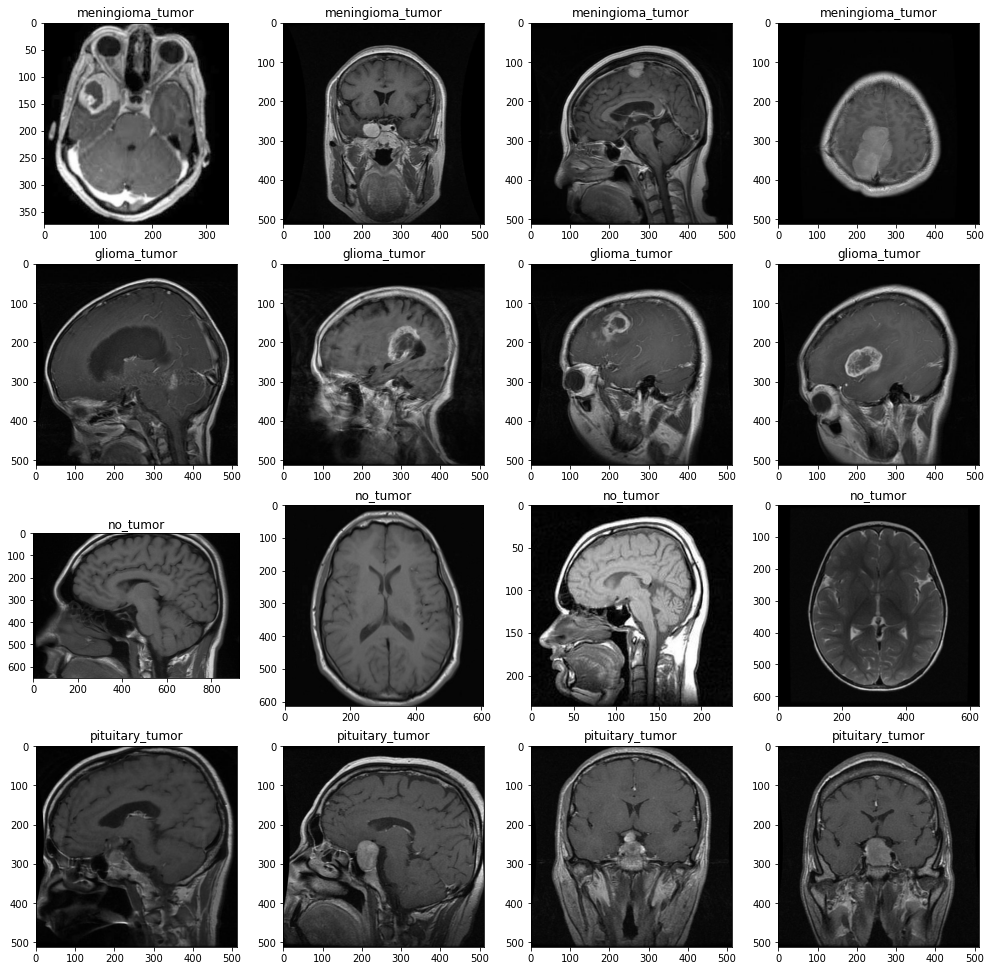

In [5]:
train_dir = "/content/Coursera-Content/Brain-MRI/Training/"
test_dir = "/content/Coursera-Content/Brain-MRI/Testing/"
classes = os.listdir("/content/Coursera-Content/Brain-MRI/Training")
filespathdict = {}

for c in classes:
  filespathdict[c] = list(map(lambda x: train_dir+c+'/'+x,os.listdir(train_dir+c)))

plt.figure(figsize=(17,17))
index=0

for c in classes:
  random.shuffle(filespathdict[c])
  pathlist=filespathdict[c][:5]

  for i in range(1,5):
    index += 1
    plt.subplot(4,4,index)
    plt.imshow(load_img(pathlist[i]))
    plt.title(c)

## Create a Function to Crop Images

In [6]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image


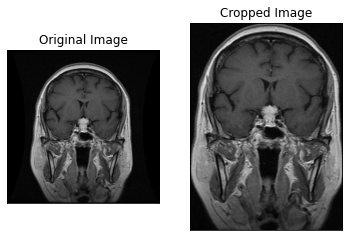

In [7]:
eximg= cv2.imread("/content/Coursera-Content/Brain-MRI/Testing/pituitary_tumor/image(86).jpg")
croppedimg=crop_image(eximg, plot=True)

## Saving The Cropped Images 

In [8]:
# Crop the Training Images and Save it to the Directory we previously cretaed
glioma = train_dir + "glioma_tumor"
meningioma = train_dir + "meningioma_tumor"
no_tumor = train_dir + "no_tumor"
pituitary = train_dir + "pituitary_tumor"

j=0
for i in tqdm(os.listdir(glioma)):
  path  = os.path.join(glioma,i)
  img = cv2.imread(path)
  img = crop_image(img, plot = False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    savepath = "/content/crop-brain-MRI/g/"  + str(j)  + ".jpg"
    cv2.imwrite(savepath,img)
    j=j+1

j=0
for i in tqdm(os.listdir(meningioma)):
  path  = os.path.join(meningioma,i)
  img = cv2.imread(path)
  img = crop_image(img, plot = False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    savepath = "/content/crop-brain-MRI/m/"  + str(j)  + ".jpg"
    cv2.imwrite(savepath,img)
    j=j+1

j=0
for i in tqdm(os.listdir(no_tumor)):
  path  = os.path.join(no_tumor,i)
  img = cv2.imread(path)
  img = crop_image(img, plot = False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    savepath = "/content/crop-brain-MRI/n/"  + str(j)  + ".jpg"
    cv2.imwrite(savepath,img)
    j=j+1

j=0
for i in tqdm(os.listdir(pituitary)):
  path  = os.path.join(pituitary,i)
  img = cv2.imread(path)
  img = crop_image(img, plot = False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    savepath = "/content/crop-brain-MRI/p/"  + str(j)  + ".jpg"
    cv2.imwrite(savepath,img)
    j=j+1

100%|██████████| 901/901 [00:05<00:00, 169.69it/s]


In [9]:
# Crop the Testing Images and Save it to the Directory we previously cretaed

glioma = test_dir + "glioma_tumor"
meningioma = test_dir + "meningioma_tumor"
no_tumor = test_dir + "no_tumor"
pituitary = test_dir + "pituitary_tumor"

j=0
for i in tqdm(os.listdir(glioma)):
  path  = os.path.join(glioma,i)
  img = cv2.imread(path)
  img = crop_image(img, plot = False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    savepath = "/content/test/g/"  + str(j)  + ".jpg"
    cv2.imwrite(savepath,img)
    j=j+1

j=0
for i in tqdm(os.listdir(meningioma)):
  path  = os.path.join(meningioma,i)
  img = cv2.imread(path)
  img = crop_image(img, plot = False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    savepath = "/content/test/m"  + str(j)  + ".jpg"
    cv2.imwrite(savepath,img)
    j=j+1

j=0
for i in tqdm(os.listdir(no_tumor)):
  path  = os.path.join(no_tumor,i)
  img = cv2.imread(path)
  img = crop_image(img, plot = False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    savepath = "/content/test/n"  + str(j)  + ".jpg"
    cv2.imwrite(savepath,img)
    j=j+1

j=0
for i in tqdm(os.listdir(pituitary)):
  path  = os.path.join(pituitary,i)
  img = cv2.imread(path)
  img = crop_image(img, plot = False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    savepath = "/content/test/p/"  + str(j)  + ".jpg"
    cv2.imwrite(savepath,img)
    j=j+1

100%|██████████| 5/5 [00:00<00:00, 131.92it/s]


## Perform Data Augmentation and Prepare the Train, Validation and Test Dataset

In [10]:
# Use Image Data Generator to perform this task.
datagen = ImageDataGenerator(rotation_range=10,height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_data = datagen.flow_from_directory('/content/crop-brain-MRI', target_size= (224,224), batch_size =32, class_mode ='categorical',subset= 'training')
valid_data = datagen.flow_from_directory('/content/crop-brain-MRI', target_size= (224,224), batch_size =32, class_mode ='categorical',subset= 'validation')
testdatagen = ImageDataGenerator()
test_data = testdatagen.flow_from_directory('/content/test', target_size= (224,224),  class_mode ='categorical')


Found 2613 images belonging to 4 classes.
Found 652 images belonging to 4 classes.
Found 10 images belonging to 4 classes.


In [11]:
# View the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)

{'g': 0, 'm': 1, 'n': 2, 'p': 3}
{'g': 0, 'm': 1, 'n': 2, 'p': 3}


<function matplotlib.pyplot.show>

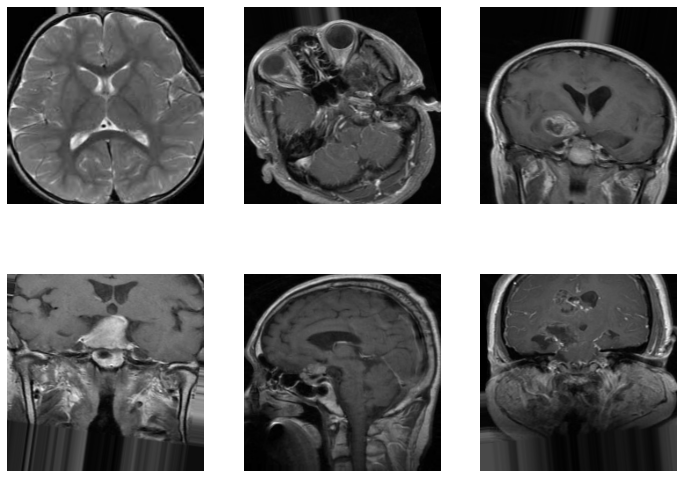

In [12]:
# View the augmented data.
samplex , sampley = next(train_data)
plt.figure(figsize=(12,9))
for i in range(6):
  plt.subplot(2,3,i +1)
  sample= array_to_img(samplex[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)
plt.show

## Build and Compile the Model 

In [13]:
# Build the Model
effnet= EfficientNetB1( weights = 'imagenet', include_top=False, input_shape=(224,224,3))
model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs = effnet.input, outputs =model)

model.summary()

27025408/27018416 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy',metrics=['accuracy'])
checkpoint= ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1,mode='auto')
earlystop =  EarlyStopping(monitor='val_accuracy', mode='auto', patience=5, verbose=1)

## Model Training and Model Evaluation

In [16]:
# Train the model
history = model.fit(train_data, epochs=7, validation_data=valid_data, verbose=1, callbacks=[checkpoint, earlystop])

Epoch 1/7
82/82 [==============================] - 92s 607ms/step - loss: 0.4506 - accuracy: 0.8442 - val_loss: 2.8589 - val_accuracy: 0.6365

Epoch 00001: val_accuracy improved from -inf to 0.63650, saving model to model.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/7
82/82 [==============================] - 46s 557ms/step - loss: 0.2261 - accuracy: 0.9242 - val_loss: 0.4856 - val_accuracy: 0.8666

Epoch 00002: val_accuracy improved from 0.63650 to 0.86656, saving model to model.h5
Epoch 3/7
82/82 [==============================] - 46s 555ms/step - loss: 0.1621 - accuracy: 0.9457 - val_loss: 0.3020 - val_accuracy: 0.9110

Epoch 00003: val_accuracy improved from 0.86656 to 0.91104, saving model to model.h5
Epoch 4/7
82/82 [==============================] - 45s 551ms/step - loss: 0.1278 - accuracy: 0.9579 - val_loss: 0.2145 - val_accuracy: 0.9479

Epoch 00004: val_accuracy improved from 0.91104 to 0.94785, saving model to model.h5
Epoch 5/7
82/82 [==============================] - 46s 554ms/step - loss: 0.1048 - accuracy: 0.9675 - val_loss: 0.3920 - val_accuracy: 0.9003

Epoch 00005: val_accuracy did not improve from 0.94785
Epoch 6/7
82/82 [==============================] - 45s 551ms/step - loss: 0.0952 - accuracy: 0.9663 - val_loss: 0.2934

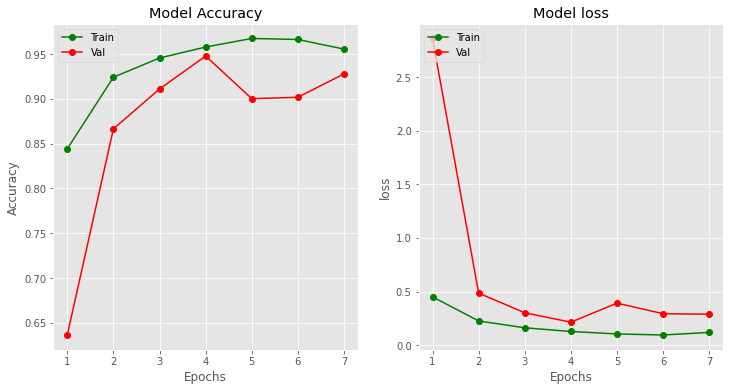

In [17]:
# Plot the training curves
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
epochs=range(1,8)
plt.subplot(1,2,1)
plt.plot(epochs, history.history["accuracy"], "go-")
plt.plot(epochs, history.history["val_accuracy"], "ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"], loc="upper left")


plt.subplot(1,2,2)
plt.plot(epochs, history.history["loss"], "go-")
plt.plot(epochs, history.history["val_loss"], "ro-")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Train", "Val"], loc="upper left")

In [18]:
# Evaluate the model on Test Set
model.evaluate(test_data)


1/1 [==============================] - 1s 676ms/step - loss: 0.8591 - accuracy: 0.9000


[0.8591479063034058, 0.8999999761581421]

## Obtaining Predictions on Test Images

gliomatumor


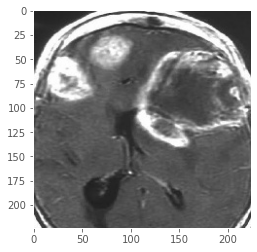

In [19]:
# Obtain Predictions on Test Images
class_dict = {0: 'gliomatumor', 1: 'meningiomatumor', 2: 'notumor', 3 : 'pituitarytumor'}

test_img1 = cv2.imread('/content/test/g/1.jpg')
plt.imshow(test_img1)
plt.grid(False)
test_img1 = np.expand_dims(test_img1, axis=0)
pred = model.predict(test_img1)
pred  = np.argmax(pred)
predclass = class_dict[pred]
print(predclass)